In [1]:
import numpy as np
import matplotlib.pyplot as plt

3. 2D Linear Regression

In [2]:
x = np.loadtxt('data1/ex1_1x.dat')  # 载入数据
y = np.loadtxt('data1/ex1_1y.dat')

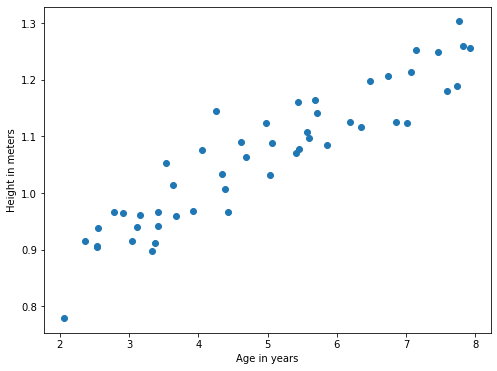

In [3]:
# 依据数据画出散点图
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o')
plt.ylabel('Height in meters')
plt.xlabel('Age in years')
plt.show()

In [4]:
# 整理数据
m = y.shape[0]
x = np.hstack((np.ones((m, 1)), x.reshape(-1, 1)))
y = y.reshape(-1, 1)

假设函数：
$$
h_{\theta}(x)=\theta^Tx=\sum_{j=0}^{n}\theta_jx_j
$$

In [5]:
def h(theta, X):
    return np.dot(X, theta)

损失函数：
$$
J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2
$$

In [6]:
def J(theta, X, Y):
    return (1./2*m) * np.dot((h(theta, X)-Y).T, h(theta, X)-Y)

梯度下降：
$$
\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In [7]:
def descendGradient(learning_rate, theta, X, Y, iterations):
    theta_record = []   # 记录theta
    J_record = []       # 记录损失
    temp_theta = theta
    for i in range(iterations):
        theta_record.append(temp_theta.tolist())
        theta = temp_theta
        # print(theta_record)
        for j in range(len(theta)):
            temp_theta[j] = theta[j] - (learning_rate/m) * np.sum((h(theta, X)-Y) * X[:, j].reshape(-1, 1))
        J_record.append(J(theta, X, Y).tolist())
    theta_record = np.array(theta_record).reshape(-1, len(theta))
    J_record = np.array(J_record).reshape(-1)
    return theta, theta_record, J_record

In [8]:
learning_rate = 0.07
theta = np.zeros((x.shape[1], 1))

In [9]:
theta, theta_record, J_record = descendGradient(learning_rate, theta, x, y, 1500)

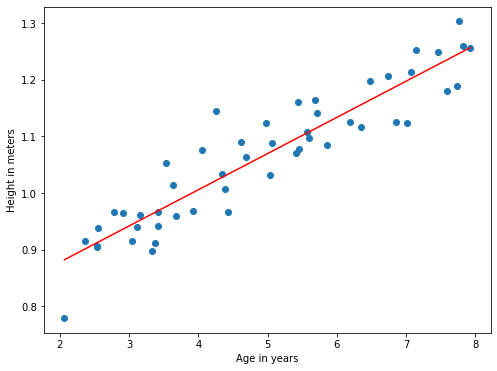

In [10]:
# 依据数据画出散点图
plt.figure(figsize=(8, 6))
plt.plot(x[:, 1], y, 'o')
plt.plot(x[:, 1], h(theta, x), 'r')
plt.ylabel('Height in meters')
plt.xlabel('Age in years')
plt.show()

In [11]:
def pred(theta, x):
    x = np.array(x).reshape(-1)
    x = np.hstack(([1], x)).reshape(-1, 1)
    y = np.dot(theta.T, x)
    return y.reshape(-1)

In [12]:
# 预测身高
a = 3.5
b = 7
pred1 = pred(theta, a)
pred2 = pred(theta, b)
print('input=', a, ', pred=', pred1)
print('input=', b, ', pred=', pred2)

input= 3.5 , pred= [0.97374443]
input= 7 , pred= [1.19733227]


4. Understanding $J(\theta)$

In [13]:
step_num = 100
J_vals = np.zeros((step_num, step_num))
theta_vals_0 = np.linspace(-3, 3, step_num)
theta_vals_1 = np.linspace(-1, 1, step_num)

In [14]:
for i in range(step_num):
    for j in range(step_num):
        J_vals[i][j] = J(np.array((theta_vals_0[i], theta_vals_1[j])).reshape(-1, 1), x, y)

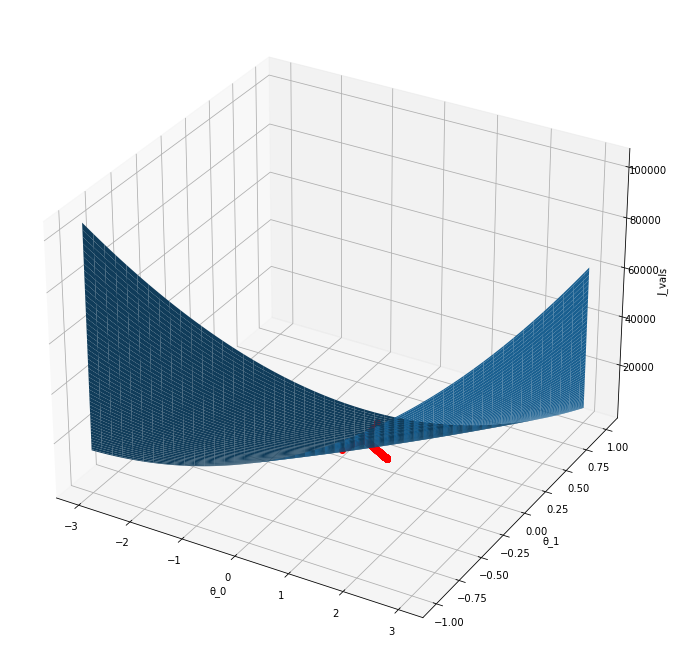

In [15]:
plt.figure(figsize=(15, 12))
ax3d = plt.axes(projection='3d')
ax3d.plot_surface(theta_vals_0, theta_vals_1, J_vals)
ax3d.set_xlabel('θ_0')
ax3d.set_ylabel('θ_1')
ax3d.set_zlabel('J_vals')
plt.plot(theta_record[:, 0], theta_record[:, 1], J_record, 'ro')
plt.show()

5. Multivariate Linear Regression

In [16]:
x = np.loadtxt('data1/ex1_2x.dat')  # 载入数据
y = np.loadtxt('data1/ex1_2y.dat')

In [17]:
sigma = x.std(axis=0)
mu = x.mean(axis=0)

In [18]:
def normalize(x):
    temp = x.reshape(-1, 2)
    temp[:, 0] = (temp[:, 0] - mu[0]) / sigma[0]
    temp[:, 1] = (temp[:, 1] - mu[1]) / sigma[1]
    return temp

In [19]:
x = normalize(x)

In [20]:
# 整理数据
m = y.shape[0]
x = np.hstack((np.ones((m, 1)), x.reshape(-1, 2)))
y = y.reshape(-1, 1)

In [21]:
iteration = 50
_, _, J_record_1 = descendGradient(0.01, np.zeros((x.shape[1], 1)), x, y, iteration)
_, _, J_record_2 = descendGradient(0.03, np.zeros((x.shape[1], 1)), x, y, iteration)
_, _, J_record_3 = descendGradient(0.1, np.zeros((x.shape[1], 1)), x, y, iteration)
_, _, J_record_4 = descendGradient(0.3, np.zeros((x.shape[1], 1)), x, y, iteration)

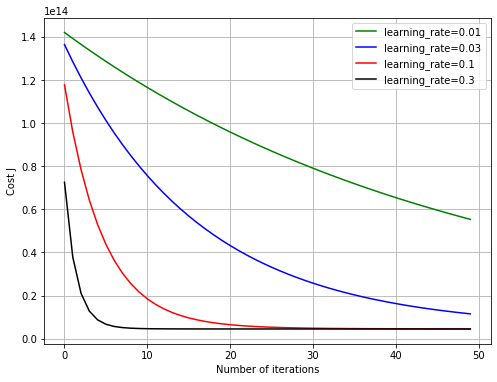

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(range(iteration), J_record_1, 'g-', label='learning_rate=0.01')
plt.plot(range(iteration), J_record_2, 'b-', label='learning_rate=0.03')
plt.plot(range(iteration), J_record_3, 'r-', label='learning_rate=0.1')
plt.plot(range(iteration), J_record_4, 'k-', label='learning_rate=0.3')
plt.ylabel('Cost J')
plt.xlabel('Number of iterations')
plt.grid()
plt.legend()
plt.show()

In [23]:
learning_rate = 0.1
theta = np.zeros((x.shape[1], 1))

In [24]:
theta, theta_record, J_record = descendGradient(learning_rate, theta, x, y, iteration)

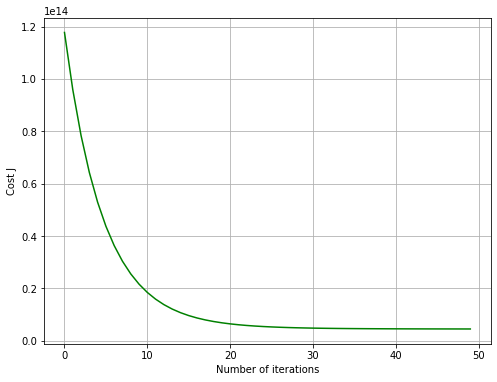

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(range(iteration), J_record, 'g-')
plt.ylabel('Cost J')
plt.xlabel('Number of iterations')
plt.grid()
plt.show()

In [26]:
print('final theta:', theta[0], theta[1], theta[2])
print('input=', 1650, 3, ', pred=', pred(theta, normalize(np.array([1650., 3.]))))

final theta: [338658.2492493] [103857.9363055] [-1143.58125322]
input= 1650 3 , pred= [292591.61055057]
